In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Imports from parent directory
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
# Go back to current directory
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
experiment_main_dir = 'Experiment'
anom_comm_names = [f'AnomComm000000000{str(i+1).zfill(2)}' for i in range(0, 10)]

In [5]:
res_analyzer = ResultsAnalyzer(experiment_main_dir, EXPERIMENT_SETTINGS, anom_comm_names)

# Meta-Features predictive ranking ability comparison

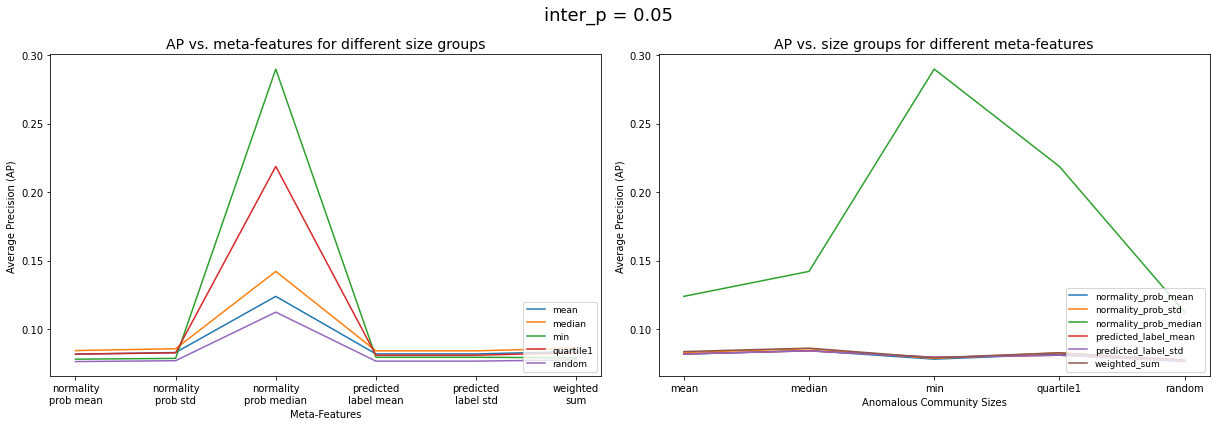

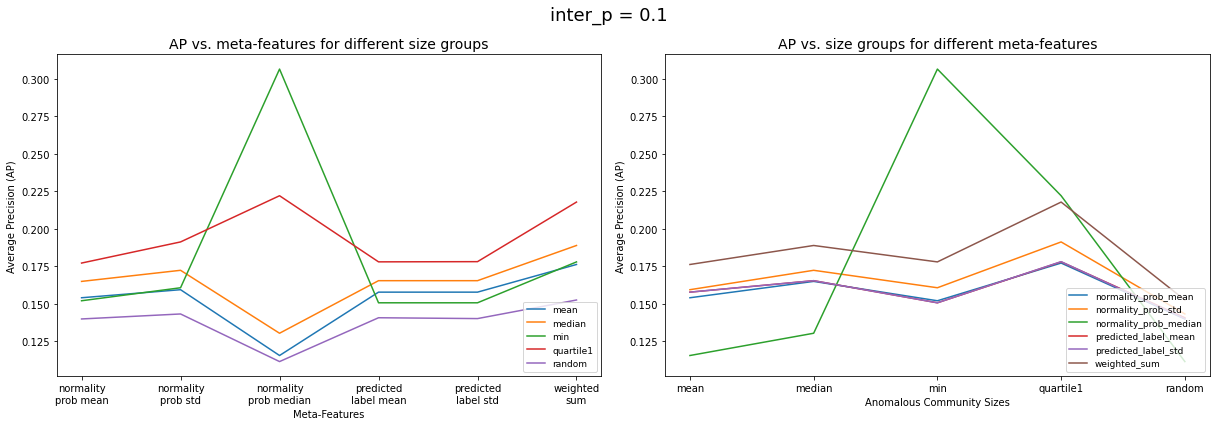

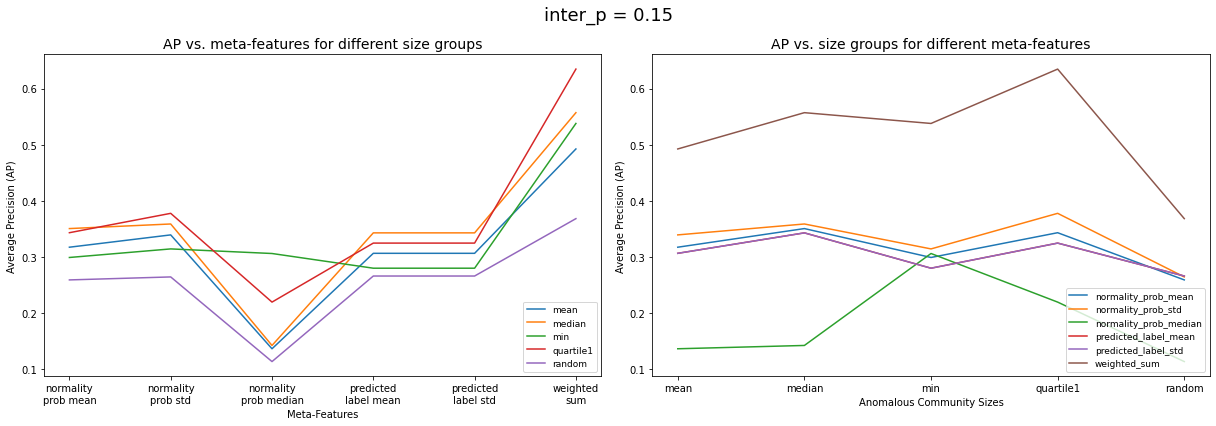

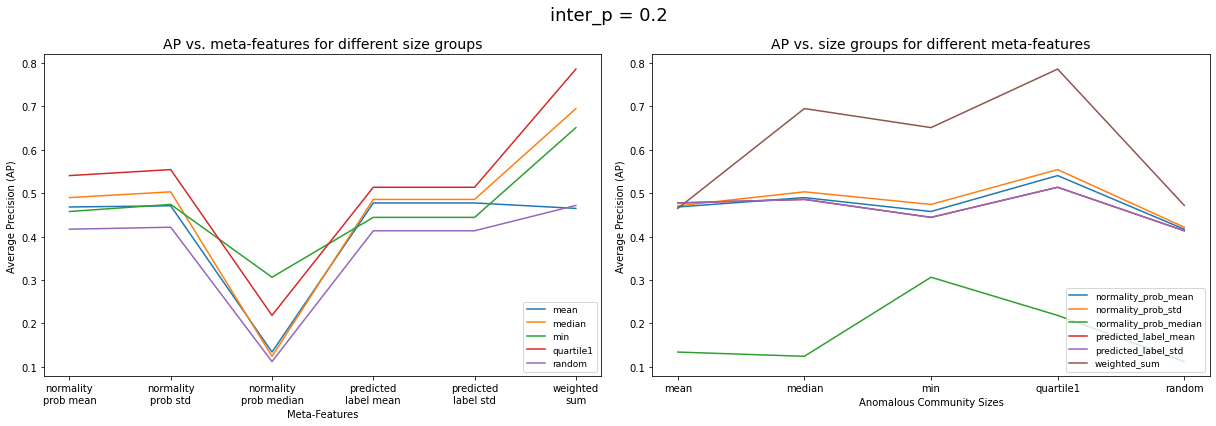

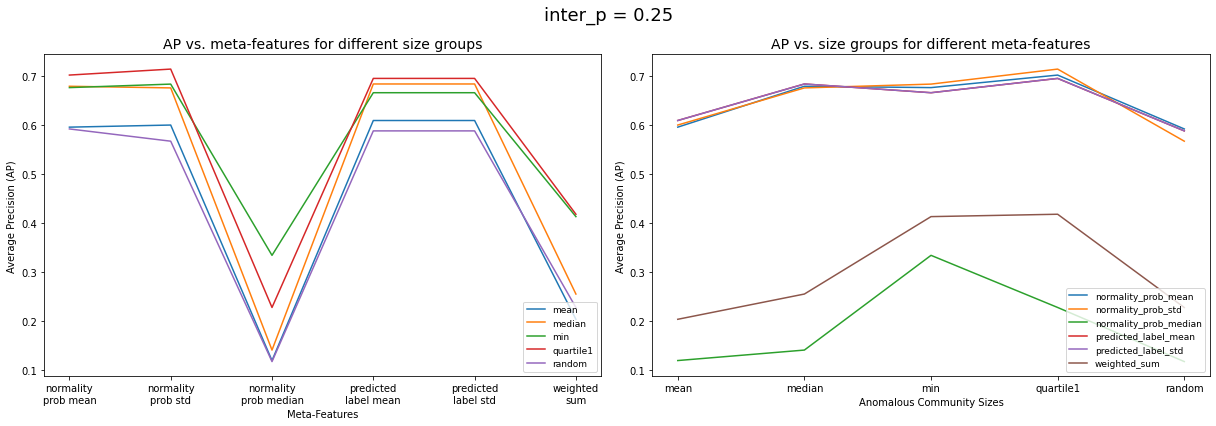

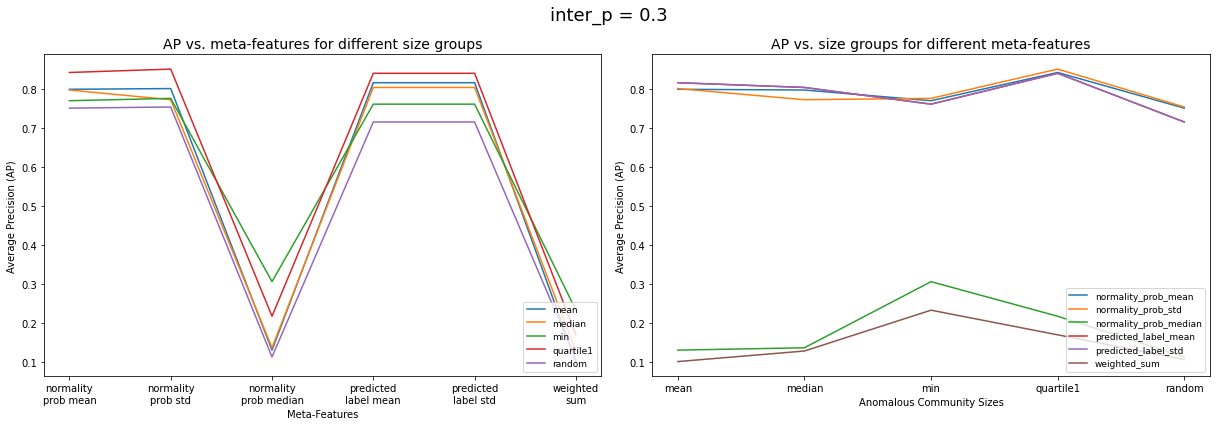

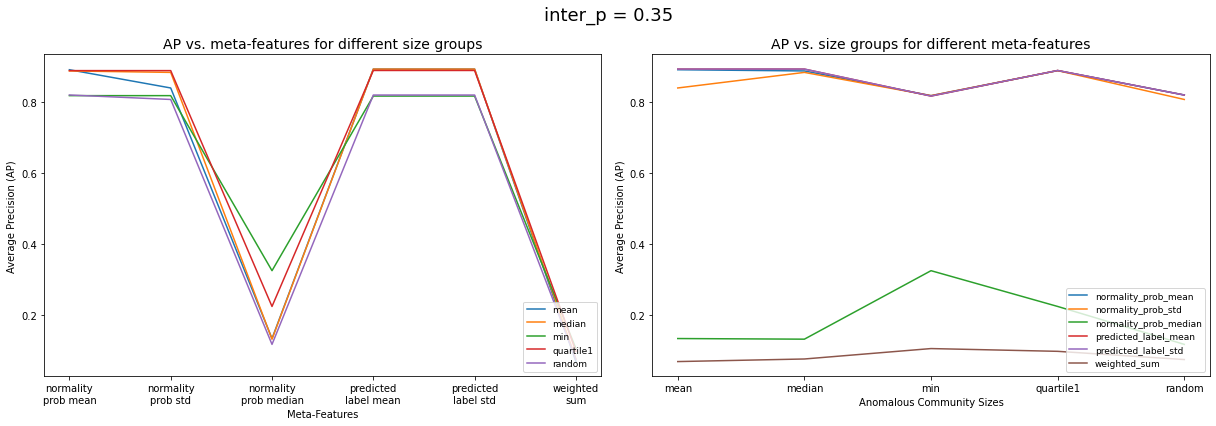

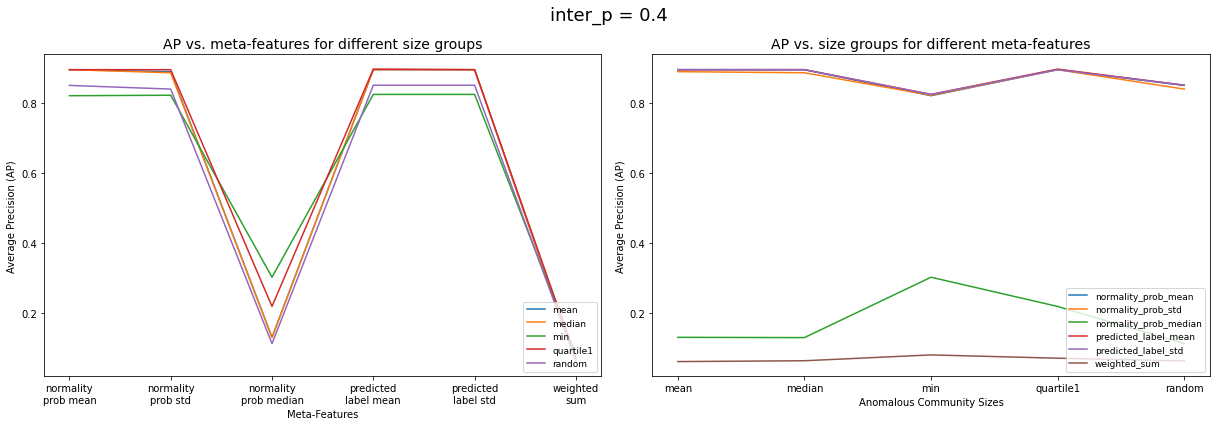

In [6]:
res_analyzer.plot_meta_features_comparison_grouped_by_ps_size_groups(skip_median=False)

In [7]:
meta_features_comparison_df = res_analyzer.get_meta_features_comparison_df()
meta_features_comparison_df.head()

,normality_prob_mean,normality_prob_std,normality_prob_median,predicted_label_mean,predicted_label_std,weighted_sum
anom_inter_p,,,,,,
0.050,0.080,0.081,0.177,0.081,0.081,0.082
0.100,0.158,0.165,0.177,0.158,0.158,0.183
0.150,0.314,0.331,0.184,0.304,0.304,0.518
0.200,0.475,0.485,0.179,0.467,0.467,0.613
0.250,0.648,0.647,0.187,0.648,0.648,0.303


In [8]:
meta_features_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,normality_prob_mean,normality_prob_std,normality_prob_median,predicted_label_mean,predicted_label_std,weighted_sum
mean,0.525,0.527,0.182,0.523,0.523,0.250
median,0.561,0.566,0.180,0.557,0.557,0.165
std,0.316,0.310,0.004,0.317,0.317,0.210


normality_prob_std is the best meta-feature

# Evaluate with different parameters 

## Anom_inter_p

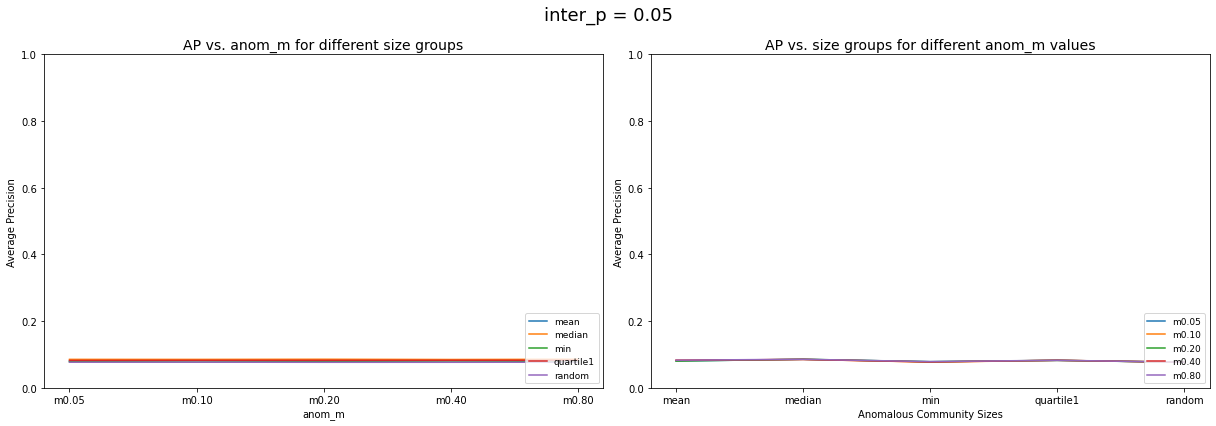

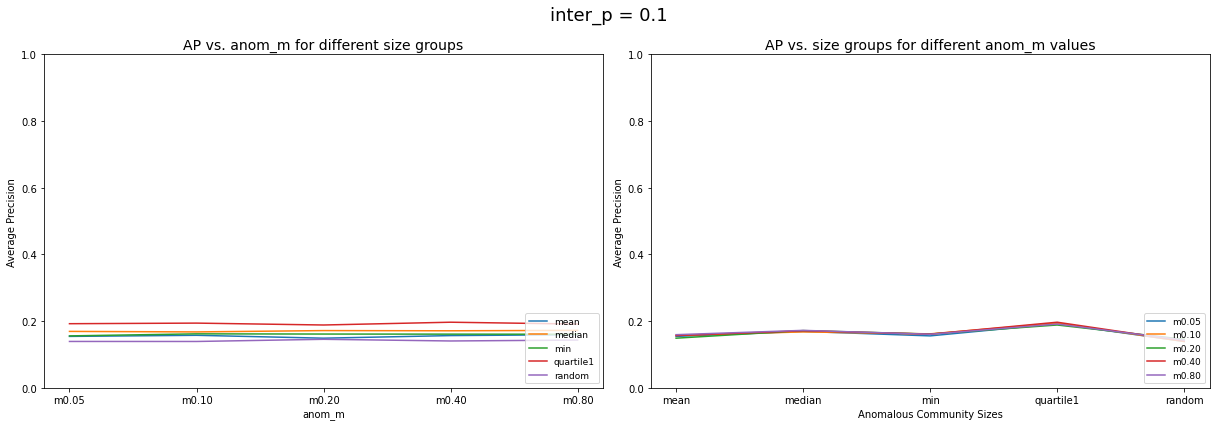

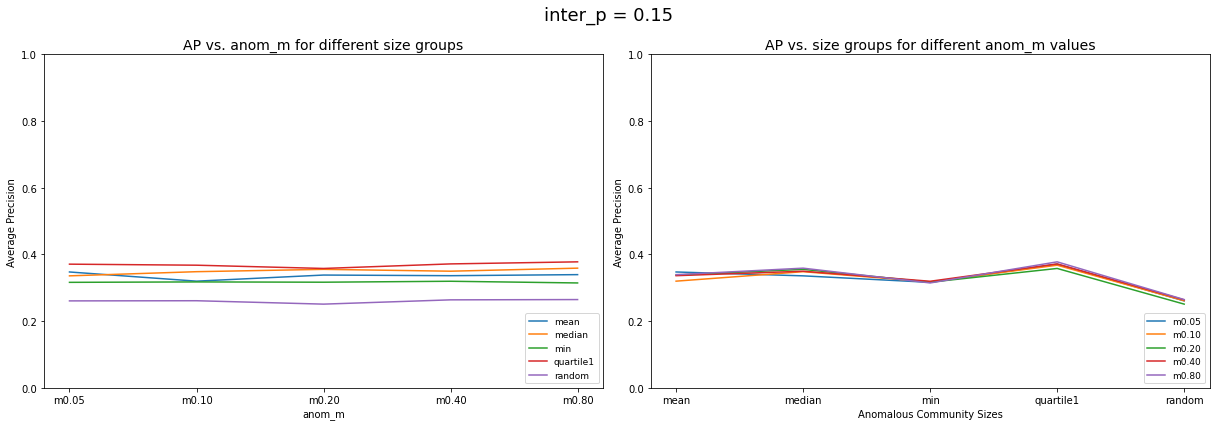

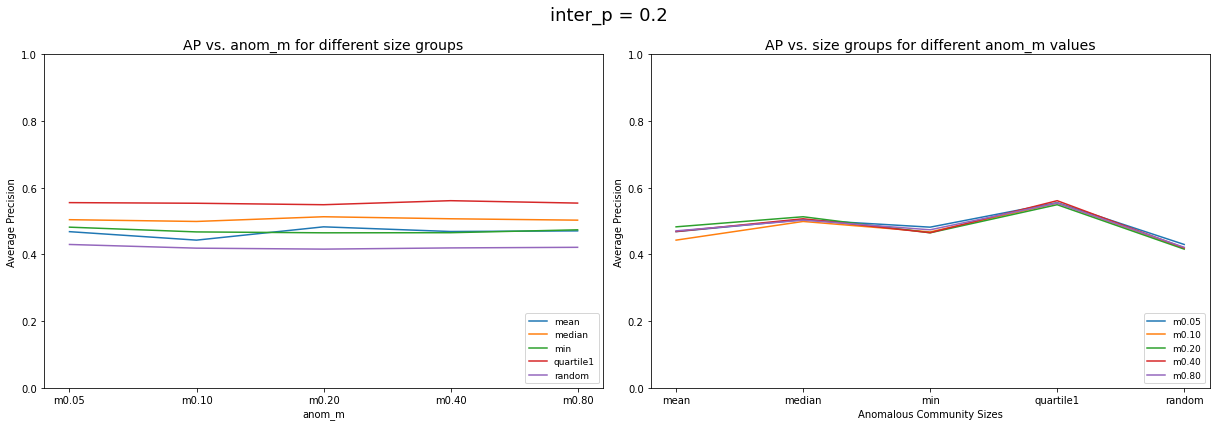

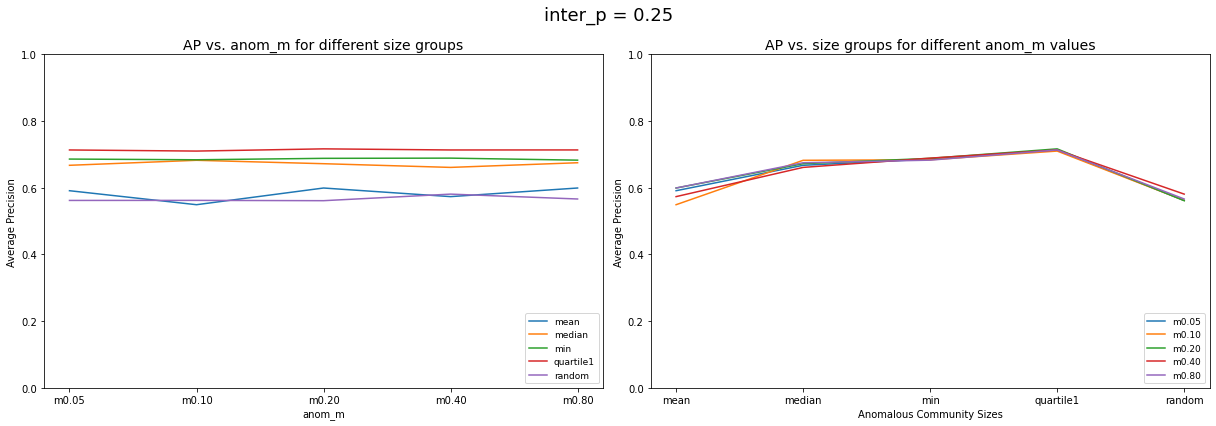

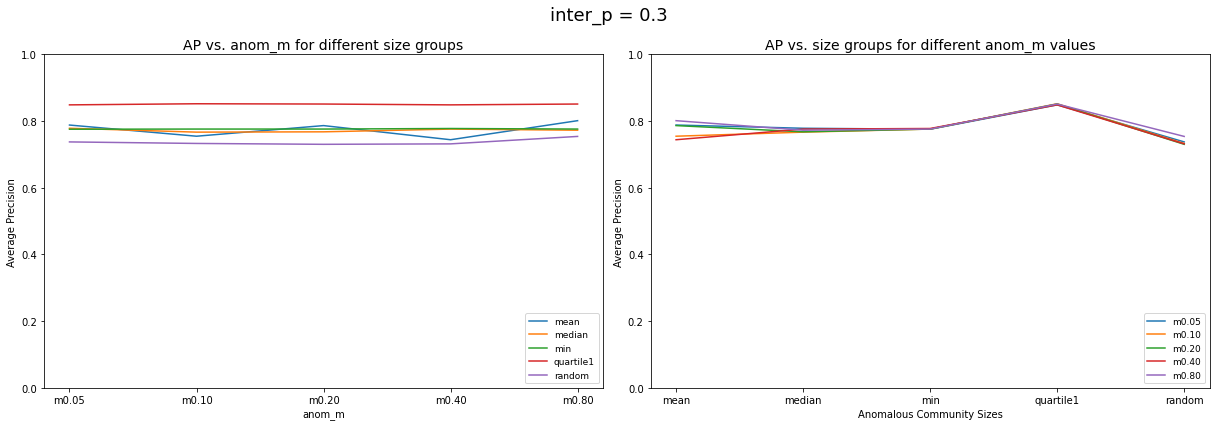

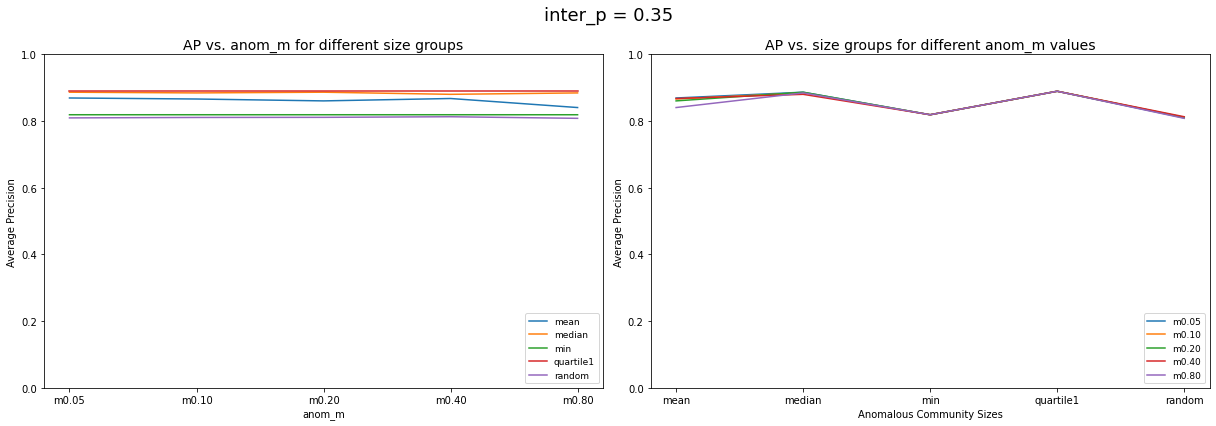

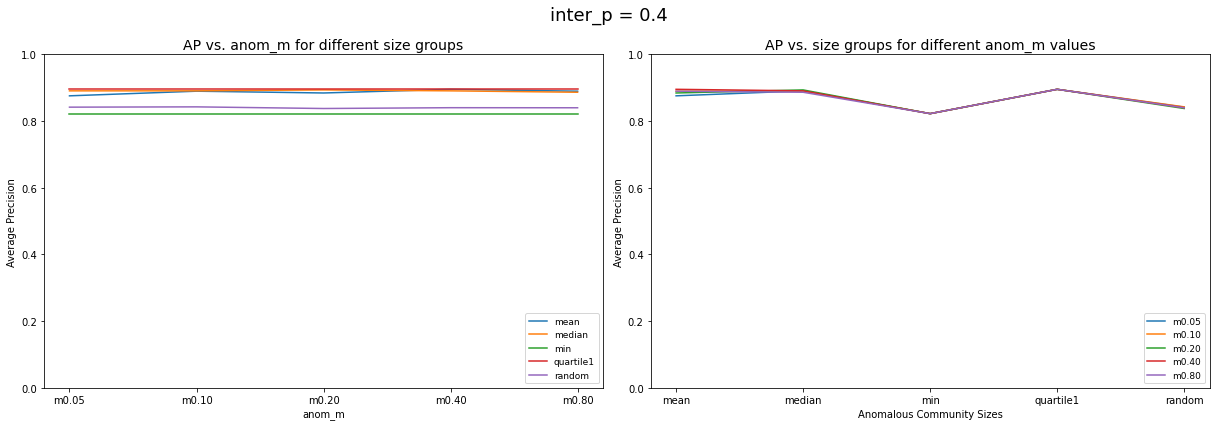

In [9]:
res_analyzer.plot_grouped_by_ps_ms_and_size_groups('normality_prob_std')

In [10]:
ps_comparison_df = res_analyzer.get_ps_comparison_df('normality_prob_std')
ps_comparison_df

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
size_group,,,,,,,,
min,0.078,0.160,0.317,0.471,0.686,0.776,0.819,0.822
quartile1,0.082,0.193,0.369,0.555,0.714,0.850,0.890,0.895
median,0.085,0.170,0.350,0.505,0.672,0.772,0.885,0.891
mean,0.082,0.155,0.336,0.467,0.583,0.775,0.861,0.887
random,0.077,0.141,0.260,0.421,0.567,0.737,0.811,0.841


In [11]:
ps_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
mean,0.081,0.164,0.326,0.484,0.644,0.782,0.853,0.867
median,0.082,0.160,0.336,0.471,0.672,0.775,0.861,0.887
std,0.004,0.019,0.042,0.050,0.065,0.041,0.037,0.033


## Anom_inter_m

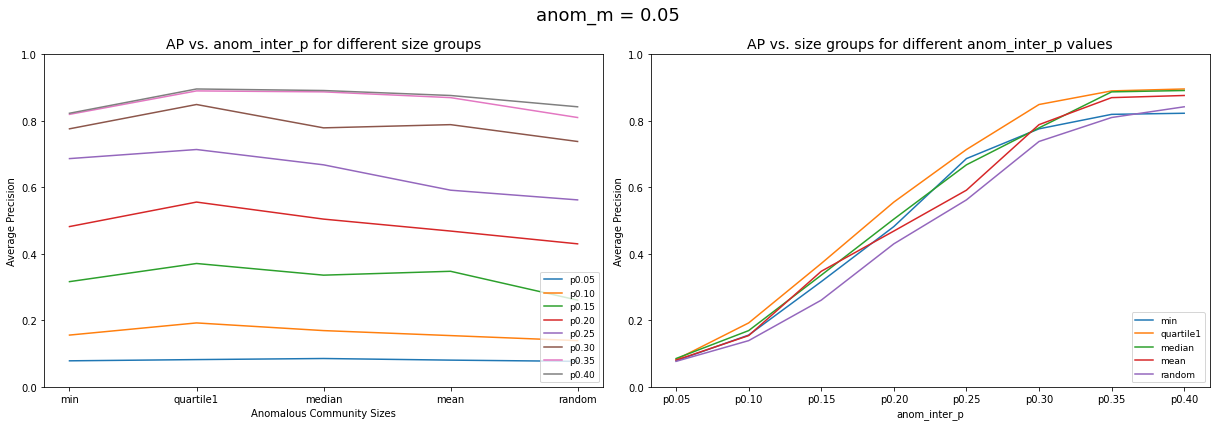

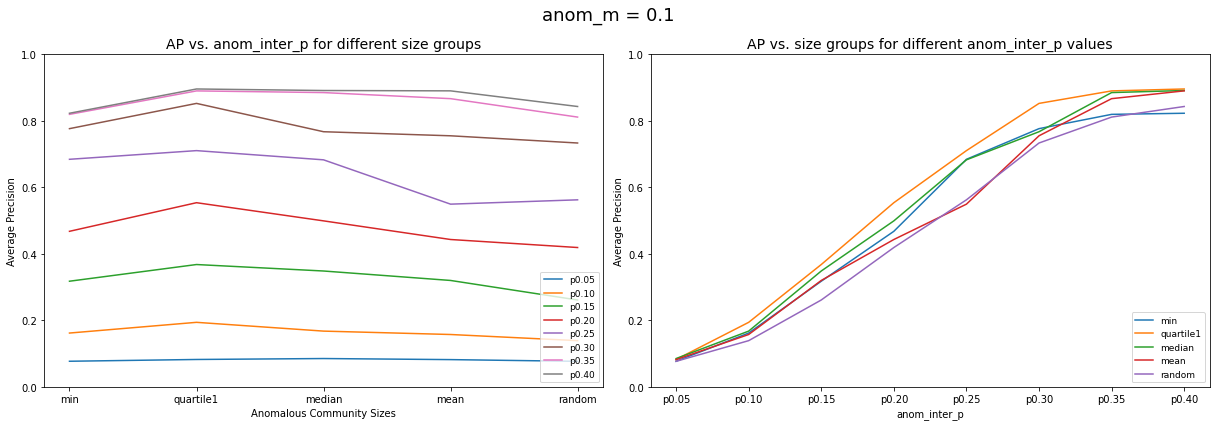

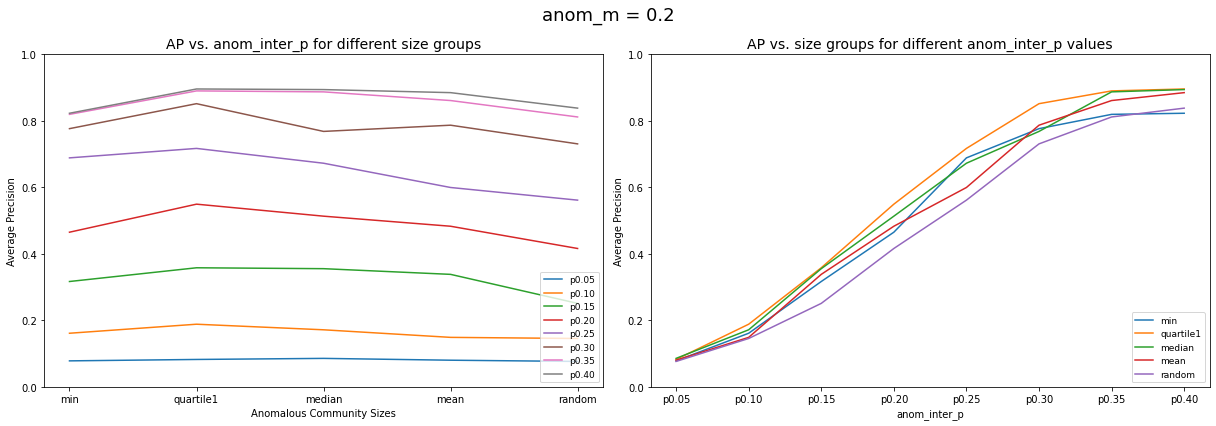

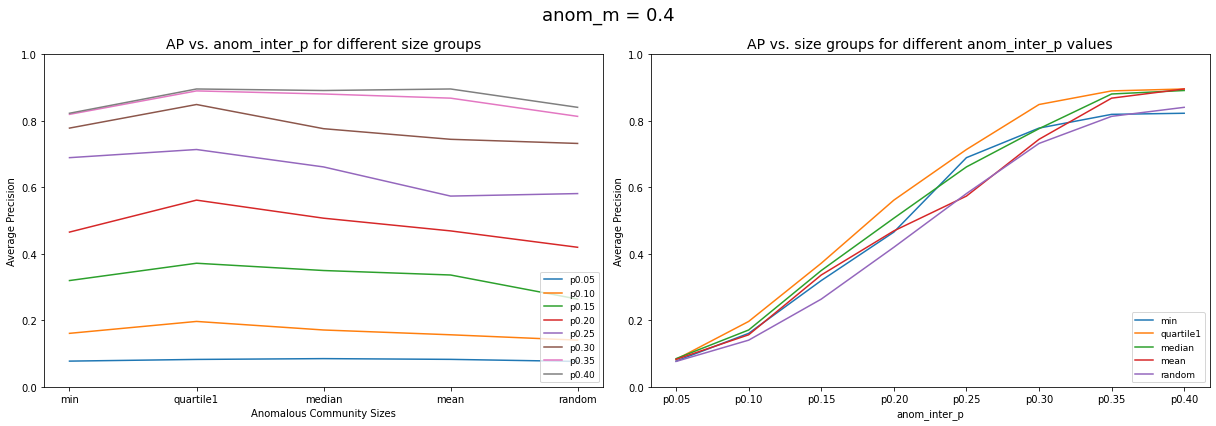

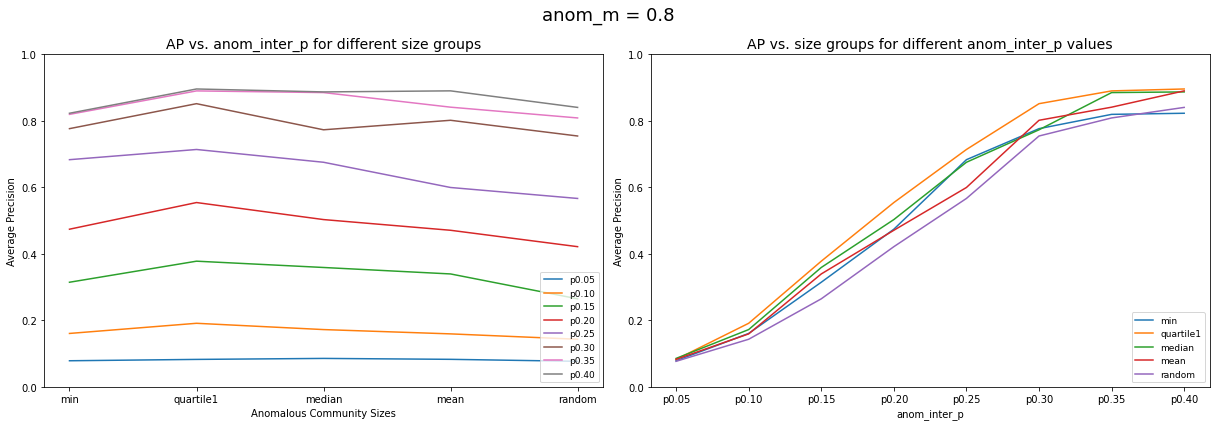

In [12]:
res_analyzer.plot_grouped_by_m_ps_and_size_groups('normality_prob_std')

In [13]:
ms_comparison_df = res_analyzer.get_ms_comparison_df('normality_prob_std')
ms_comparison_df

,0.05,0.1,0.2,0.4,0.8
anom_inter_p,,,,,
p0.05,0.081,0.081,0.081,0.081,0.081
p0.10,0.162,0.164,0.163,0.165,0.165
p0.15,0.326,0.323,0.324,0.328,0.331
p0.20,0.488,0.476,0.485,0.484,0.485
p0.25,0.644,0.638,0.648,0.644,0.647
p0.30,0.786,0.777,0.782,0.776,0.791
p0.35,0.855,0.854,0.854,0.854,0.849
p0.40,0.865,0.868,0.867,0.869,0.867


In [14]:
ms_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.2,0.4,0.8
mean,0.526,0.523,0.525,0.525,0.527
median,0.566,0.557,0.566,0.564,0.566
std,0.311,0.310,0.311,0.310,0.310


## Size groups

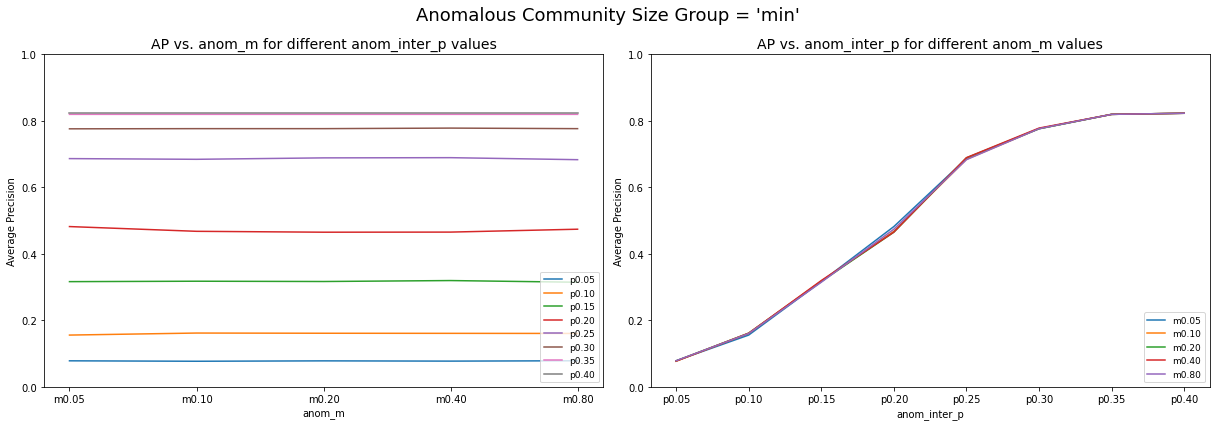

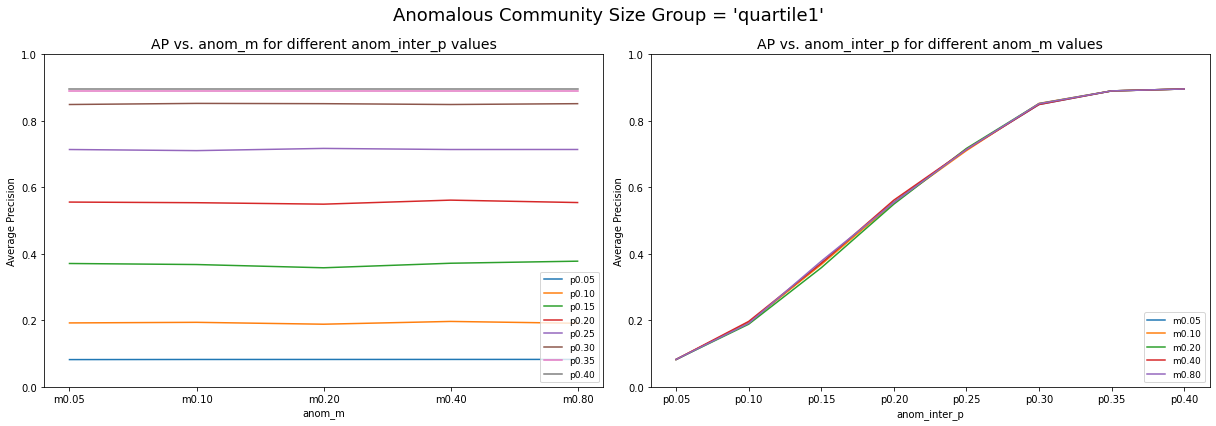

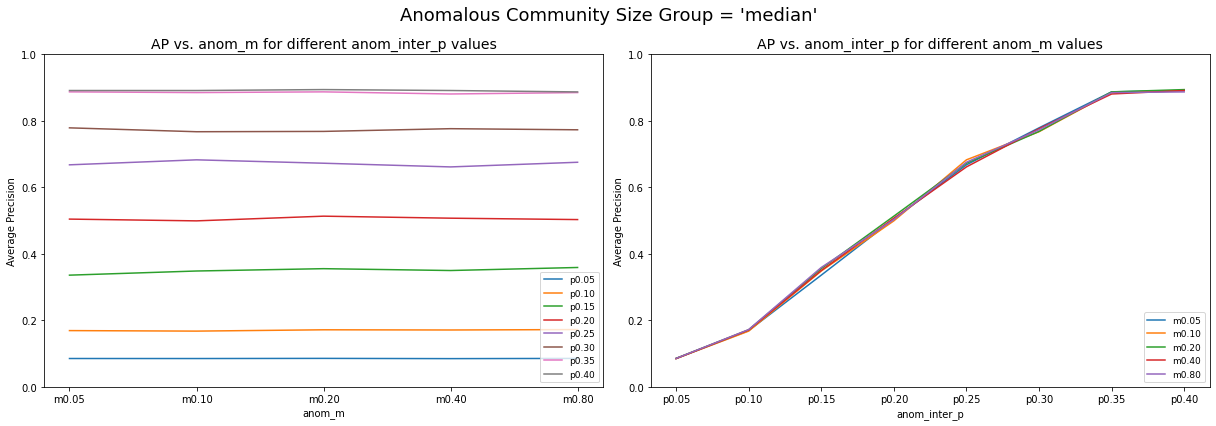

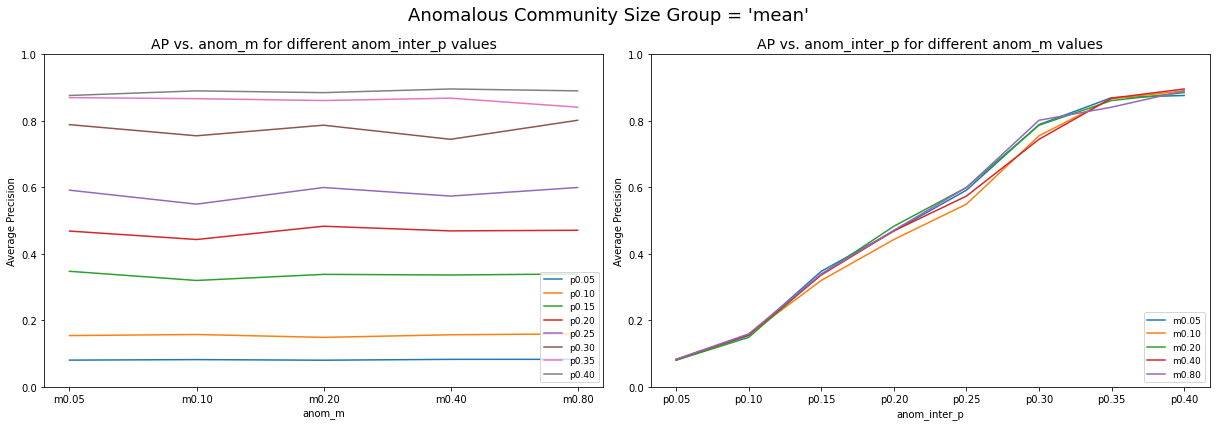

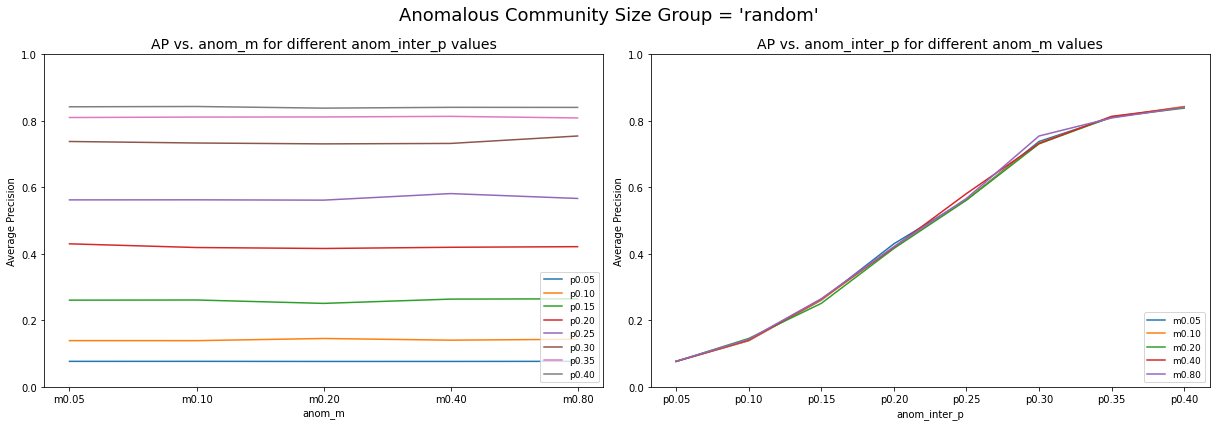

In [15]:
res_analyzer.plot_grouped_by_size_groups_ps_and_ms('normality_prob_std')

In [16]:
size_group_comparison_df = res_analyzer.get_size_groups_comparison_df('normality_prob_std')
size_group_comparison_df

,min,quartile1,median,mean,random
anom_m,,,,,
p0.05,0.078,0.082,0.085,0.082,0.077
p0.10,0.160,0.193,0.170,0.155,0.141
p0.15,0.317,0.369,0.350,0.336,0.260
p0.20,0.471,0.555,0.505,0.467,0.421
p0.25,0.686,0.714,0.672,0.583,0.567
p0.30,0.776,0.850,0.772,0.775,0.737
p0.35,0.819,0.890,0.885,0.861,0.811
p0.40,0.822,0.895,0.891,0.887,0.841


In [17]:
size_group_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,min,quartile1,median,mean,random
mean,0.516,0.569,0.541,0.518,0.482
median,0.578,0.634,0.589,0.525,0.494
std,0.303,0.323,0.315,0.312,0.303
